In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar Fluo4-Ba_Kd

/Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar Fluo4-Ba_Kd


In [3]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
datass.pop()
datass

['Ba00.csv',
 'Ba01.csv',
 'Ba02.csv',
 'Ba03.csv',
 'Ba04.csv',
 'Ba05.csv',
 'Ba06.csv',
 'Ba07.csv',
 'Ba08.csv',
 'Ba09.csv',
 'Ba10.csv',
 'Ba11.csv',
 'Ba12.csv',
 'Ba13.csv',
 'Ba14.csv',
 'Ba15.csv',
 'Ba16.csv',
 'Ba17.csv',
 'Ba18.csv',
 'Ba19.csv',
 'Ba20.csv']

In [4]:
datass[1]

'Ba01.csv'

In [5]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(datass)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    
for x in range(0,leng):
    data[x] = pd.read_csv(datass[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = data[x]['sig']-backg['sig']
    dataf[x] = data[x][data[x]['dif']<.1]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [6]:
intensity[17]/intensity[0]

6.2679073278898789

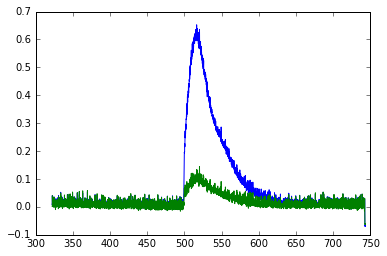

In [7]:
plt.plot(dataf[19]['wave'],dataf[19]['sig'])
plt.plot(dataf[0]['wave'],dataf[0]['sig'])

In [36]:
inte = []
for a in range(0,20):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = np.array((inte-Fmin)/(Fmax-inte))
Fs

array([  0.00000000e+00,   2.70542743e-02,   5.91763132e-02,
         1.38265835e-01,   1.83348703e-01,   4.81789370e-01,
         5.04445731e-01,   1.67893498e+00,   1.74509185e+00,
         1.56676733e+00,   1.99768861e+00,   3.78140003e+00,
         4.37844431e+00,   8.65270001e+00,   1.15341219e+01,
         3.14325973e+01,   3.35135709e+01,   7.39867079e+02,
                    inf,   7.93831386e+01])

In [37]:
xes = list(range(20))

bacon = []
for f in range(len(xes)):
    bacon.append((505e-6)*(2e-6)/(500e-6+(2e-6*xes[f])))
finalcon=np.array(np.cumsum(bacon)/1e-6)
finalcon

array([  2.02      ,   4.03195219,   6.03592045,   8.03196788,
        10.02015685,  12.00054901,  13.97320526,  15.9381858 ,
        17.89555015,  19.84535709,  21.78766479,  23.72253069,
        25.6500116 ,  27.57016369,  29.48304248,  31.38870286,
        33.2871991 ,  35.17858487,  37.06291323,  38.94023665])

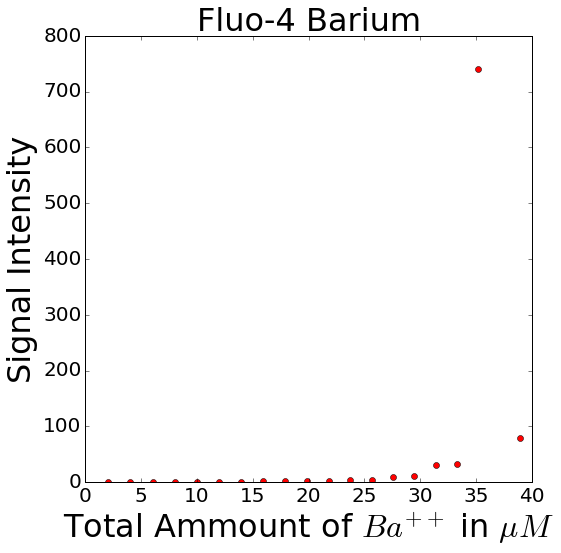

In [81]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ba^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Barium', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd.pdf')
plt.show()

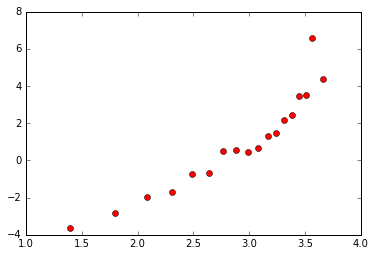

In [25]:

plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [50]:
ys =np.log(np.delete(Fs,[0,18]))
xs =np.log(np.delete(finalcon,[0,18]))
ys

array([-3.60991027, -2.82723393, -1.9785771 , -1.69636546, -0.73024825,
       -0.68429502,  0.51815965,  0.55680719,  0.44901447,  0.69199082,
        1.33009432,  1.47669348,  2.15787141,  2.44530976,  3.44784548,
        3.51195046,  6.60647055,  4.37428599])

In [68]:
ys =np.log(np.delete(Fs,[0,18]))
xs =np.log(np.delete(finalcon,[0,18]))
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-6
kd

44.705849873478613

In [70]:
fun[1]

3.7964817611151882

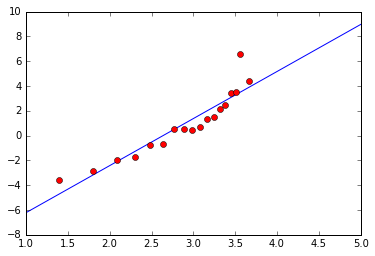

In [71]:
xvals = np.linspace(1.0, 5.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')

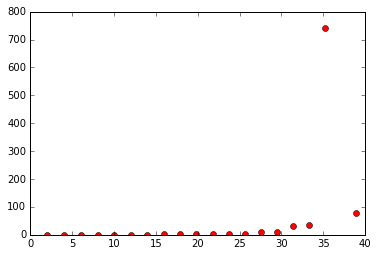

In [66]:
plt.plot(finalcon,Fs,'ro')

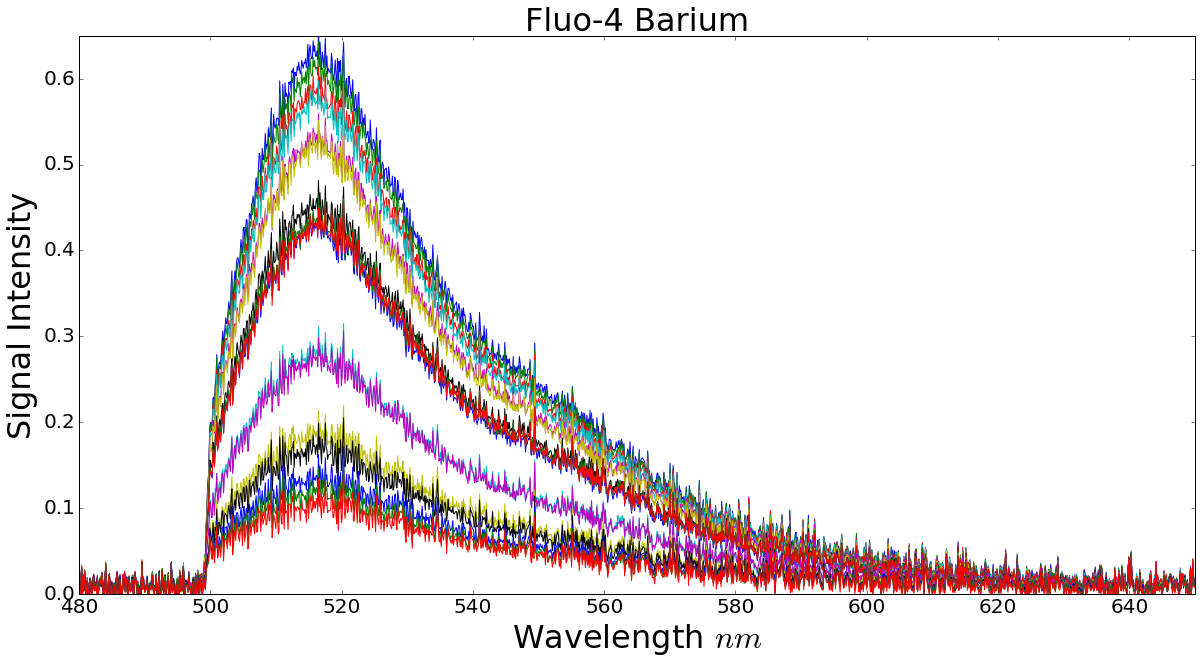

In [89]:
plt.figure(figsize=(20,10))
#plt.plot(dataf[19]['wave'],dataf[19]['sig'])
#plt.plot(dataf[18]['wave'],dataf[18]['sig'])
plt.plot(dataf[17]['wave'],dataf[17]['sig'])
#plt.plot(dataf[16]['wave'],dataf[16]['sig'])
plt.plot(dataf[15]['wave'],dataf[15]['sig'])
plt.plot(dataf[14]['wave'],dataf[14]['sig'])
plt.plot(dataf[13]['wave'],dataf[13]['sig'])
plt.plot(dataf[12]['wave'],dataf[12]['sig'])
plt.plot(dataf[11]['wave'],dataf[11]['sig'])
plt.plot(dataf[10]['wave'],dataf[10]['sig'])
plt.plot(dataf[9]['wave'],dataf[9]['sig'])
plt.plot(dataf[8]['wave'],dataf[8]['sig'])
plt.plot(dataf[7]['wave'],dataf[7]['sig'])
plt.plot(dataf[6]['wave'],dataf[6]['sig'])
plt.plot(dataf[5]['wave'],dataf[5]['sig'])
plt.plot(dataf[4]['wave'],dataf[4]['sig'])
plt.plot(dataf[3]['wave'],dataf[3]['sig'])
plt.plot(dataf[2]['wave'],dataf[2]['sig'])
plt.plot(dataf[1]['wave'],dataf[1]['sig'])
plt.plot(dataf[0]['wave'],dataf[0]['sig'])

plt.xlabel(r'Wavelength $nm$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Barium', fontsize=32)
plt.tick_params(labelsize=20)

plt.xlim(480,650)
plt.ylim(0,0.65)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd traces.pdf')

plt.show()

In [79]:
Fmax/Fmin

6.2750274005002655